In [34]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from rerf.urerf import UnsupervisedRandomForest

In [35]:
# Load dataset
iris = datasets.load_iris()

In [36]:
#Crate an object 
X = iris.data

In [37]:
clf = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)
print(clf)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)


[[1.    0.084 0.065 ... 0.    0.    0.   ]
 [0.073 1.    0.19  ... 0.    0.    0.   ]
 [0.073 0.18  1.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 1.    0.05  0.099]
 [0.    0.    0.    ... 0.05  1.    0.014]
 [0.    0.002 0.    ... 0.1   0.01  1.   ]]


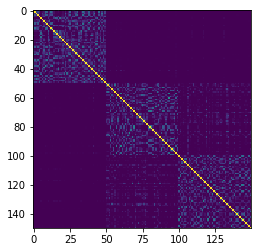

In [38]:
clf.fit(X)
sim_mat = clf.transform()
print(sim_mat)
plt.imshow(sim_mat)

1

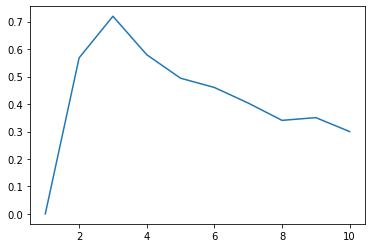

In [28]:
R = []
I = []
for i in range(1,11):
    I.append(i)
    cluster = KMeans(n_clusters=i)
    predict_labels = cluster.fit_predict(sim_mat)
    score = adjusted_rand_score(iris.target, predict_labels)
    R.append(score)

#print("labels\n", iris.target)
#print("predict\n", predict_labels)
#print("Adjusted Rand Score:", score)

plt.plot(I,R)
max_R = max(R)
max_I = I[int(max_R)]
max_I

/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/cluster/affinity_propagation_.py:224: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)
/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/cluster/affinity_propagation_.py:224: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)
/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/cluster/affinity_propagation_.py:224: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


Adjusted Rand Score: 0.0


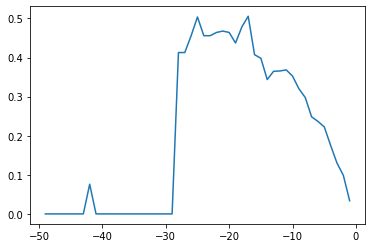

In [30]:
from sklearn.cluster import AffinityPropagation

#iris = datasets.load_iris()
#X = iris.data
clf = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)
clf.fit(X)
#sim_mat = clf.transform()
#print(sim_mat)
#plt.imshow(sim_mat)

R = []
I = []
for i in range(-1,-50,-1):
    I.append(i)
    cluster = AffinityPropagation(preference= i)
    predict_labels = cluster.fit_predict(sim_mat)
    score = adjusted_rand_score(iris.target, predict_labels)
    R.append(score)

plt.plot(I,R)
#print("labels\n", iris.target)
#print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)


Adjusted Rand Score: 0.0


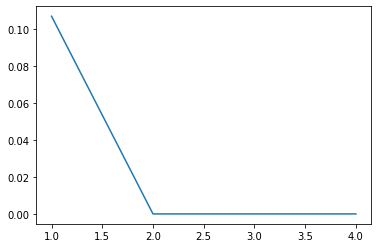

In [40]:
from sklearn.cluster import MeanShift

#iris = datasets.load_iris()
#X = iris.data
#clf = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                        # max_features='auto', min_samples_split='auto',
                         #n_estimators=1000, n_jobs=None,
                         #projection_matrix='RerF', random_state=0)
#clf.fit(X)
#sim_mat = clf.transform()
#print(sim_mat)
#plt.imshow(sim_mat)

R = []
I = []
for i in range(1, 5):
    I.append(i)
    cluster = MeanShift(bandwidth = i)
    predict_labels = cluster.fit_predict(sim_mat)
    score = adjusted_rand_score(iris.target, predict_labels)
    R.append(score)

plt.plot(I,R)
#print("labels\n", iris.target)
#print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)

/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/home/da_pj/anaconda3/lib/python3.7/site-pa

Adjusted Rand Score: 0.3587149215295819


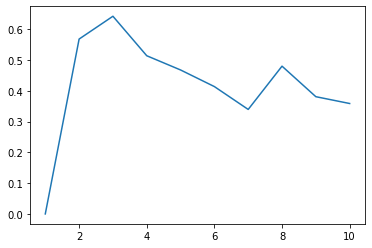

In [42]:
from sklearn.cluster import SpectralClustering 

#iris = datasets.load_iris()
#X = iris.data
#clf = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         #max_features='auto', min_samples_split='auto',
                         #n_estimators=100, n_jobs=None,
                         #projection_matrix='RerF', random_state=0)
#clf.fit(X)
#sim_mat = clf.transform()
#print(sim_mat)
#plt.imshow(sim_mat)

R = []
I = []
for i in range(1,11):
    I.append(i)
    cluster = SpectralClustering(n_clusters = i, 
                                  eigen_solver=None, 
                                  random_state=None, 
                                  n_init=10, gamma=1.0, 
                                  n_neighbors=10, 
                                  eigen_tol=0.0, 
                                  degree=3, coef0=1, kernel_params=None, n_jobs=None)
    predict_labels = cluster.fit_predict(sim_mat)
    score = adjusted_rand_score(iris.target, predict_labels)
    R.append(score)

plt.plot(I,R)
#print("labels\n", iris.target)
#print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)